##  ✍ В предыдущем юните мы рассмотрели метод Ньютона. В отличие от градиентного спуска, метод Ньютона использует на каждой итерации не только градиент, но и матрицу Гессе. Это обеспечивает более быструю сходимость к минимуму, но в то же время это приводит к слишком большим вычислительным затратам. В данном юните мы рассмотрим класс методов, в которых решается  эта проблема, — класс **квазиньютоновских методов**.

Напомним, что в методе Ньютона мы обновляем точку на каждой итерации в соответствии со следующим правилом:

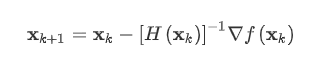

На каждом шаге здесь вычисляется гессиан, а также его обратная матрица.

### В квазиньютоновских методах вместо вычисления гессиана мы просто аппроксимируем его матрицей, которая обновляется от итерации к итерации с использованием информации, вычисленной на предыдущих шагах. Так как вместо вычисления большого количества новых величин мы использует найденные ранее значения, квазиньютоновский алгоритм тратит гораздо меньше времени и вычислительных ресурсов.

Формально это описывается следующим образом:

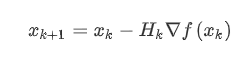

В данном случае вместо обратного гессиана появляется матрица $H_k$, которая строится таким образом, чтобы максимально точно аппроксимировать настоящий обратный гессиан.

Математически это записывается так:

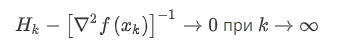

Здесь имеется в виду, что разница между матрицей в квазиньютоновском методе и обратным гессианом стремится к нулю.

### Эта матрица обновляется на каждом шаге, и для этого существуют разные способы. Для каждого из способов есть своя модификация квазиньютоновского метода. Эти способы объединены ограничением: процесс обновления матрицы должен быть достаточно эффективным и не должен требовать вычислений гессиана. То есть, по сути, на каждом шаге мы должны получать информацию о гессиане, не находя непосредственно сам гессиан.

Если вас интересует математическая сторона обновления и аппроксимации матрицы, прочитайте эту статью. В силу того, что понимание этой части метода требует очень серьёзной математической подготовки, мы опустим её. Однако можем заверить вас, что для успешного использования алгоритма и его понимания знание всех математических выводов не требуется.

**Три самые популярные схемы аппроксимации:**

+ симметричная коррекция ранга 1 (SR1);
+ схема Дэвидона — Флетчера — Пауэлла (DFP);
+ схема Бройдена — Флетчера — Гольдфарба — Шанно (BFGS).

### Последняя схема (BFGS) самая известная, стабильная и считается наиболее эффективной. На ней мы и остановимся. Своё название она получила из первых букв фамилий создателей и исследователей данной схемы: Чарли Джорджа Бройдена, Роджера Флетчера, Дональда Гольдфарба и Дэвида Шанно.

У этой схемы есть **две известных вариации:**

+ L-BFGS;
+ L-BFGS-B.

Обе этих вариации необходимы в случае большого количества переменных для экономии памяти (так как во время их реализации хранится ограниченное количество информации). По сути, они работают одинаково, и L-BFGS-B является лишь улучшенной версией L-BFGS для работы с ограничениями.

## Метод BFGS очень устойчив и на данный момент считается одним из наиболее эффективных. Поэтому, если, например, применить функцию optimize без указания метода в библиотеке SciPy, то по умолчанию будет использоваться именно BFGS либо одна из его модификаций, указанных выше. Также данный метод используется в библиотеке sklearn при решении задачи логистической регрессии.

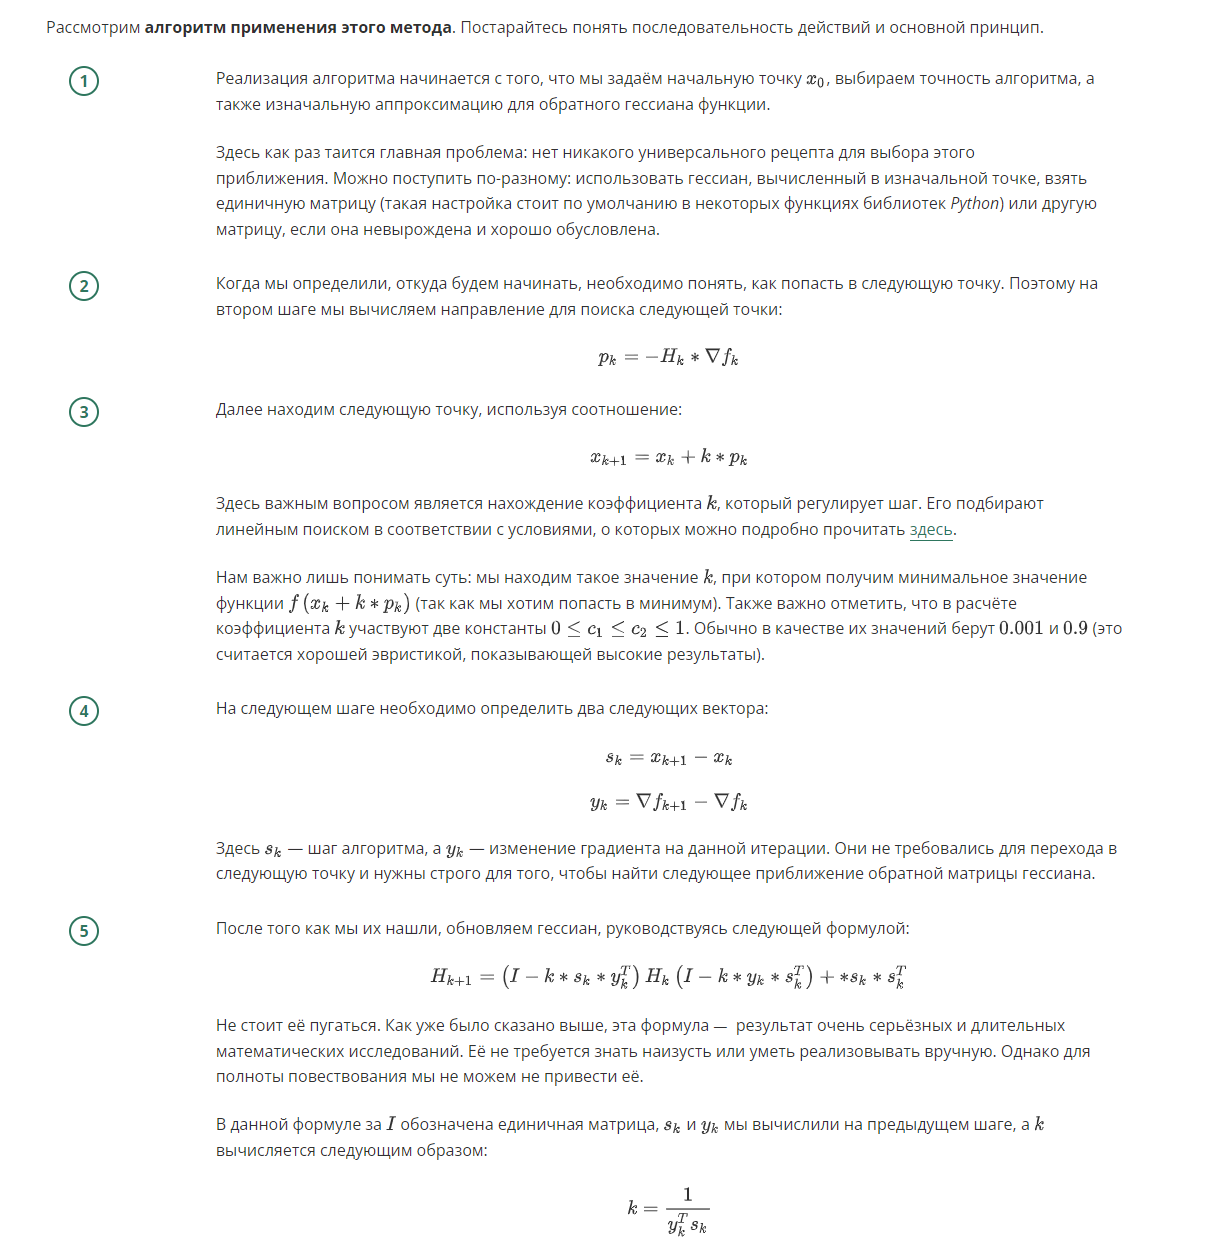

Алгоритм довольно сложный, поэтому давайте рассмотрим пример ↓

### Сразу оговоримся, что несколько шагов в этом алгоритме мы приведём без ручных расчётов (например, нахождение следующей аппроксимации гессиана) в силу их высокой сложности. Постарайтесь сильнее всего сконцентрироваться на шагах решения и понять логику работы алгоритма и последовательность действий. Мы начнём реализовывать алгоритм «вручную», а затем вы сможете самостоятельно завершить решение задачи с использованием Python (разумеется, далее будет указано, как это сделать). К сожалению, серьёзные и эффективные методы настолько сложны, что решать с их помощью задачи, используя только лист бумаги, ручку и калькулятор (как мы могли это делать, например, с методом Лагранжа), уже невозможно.

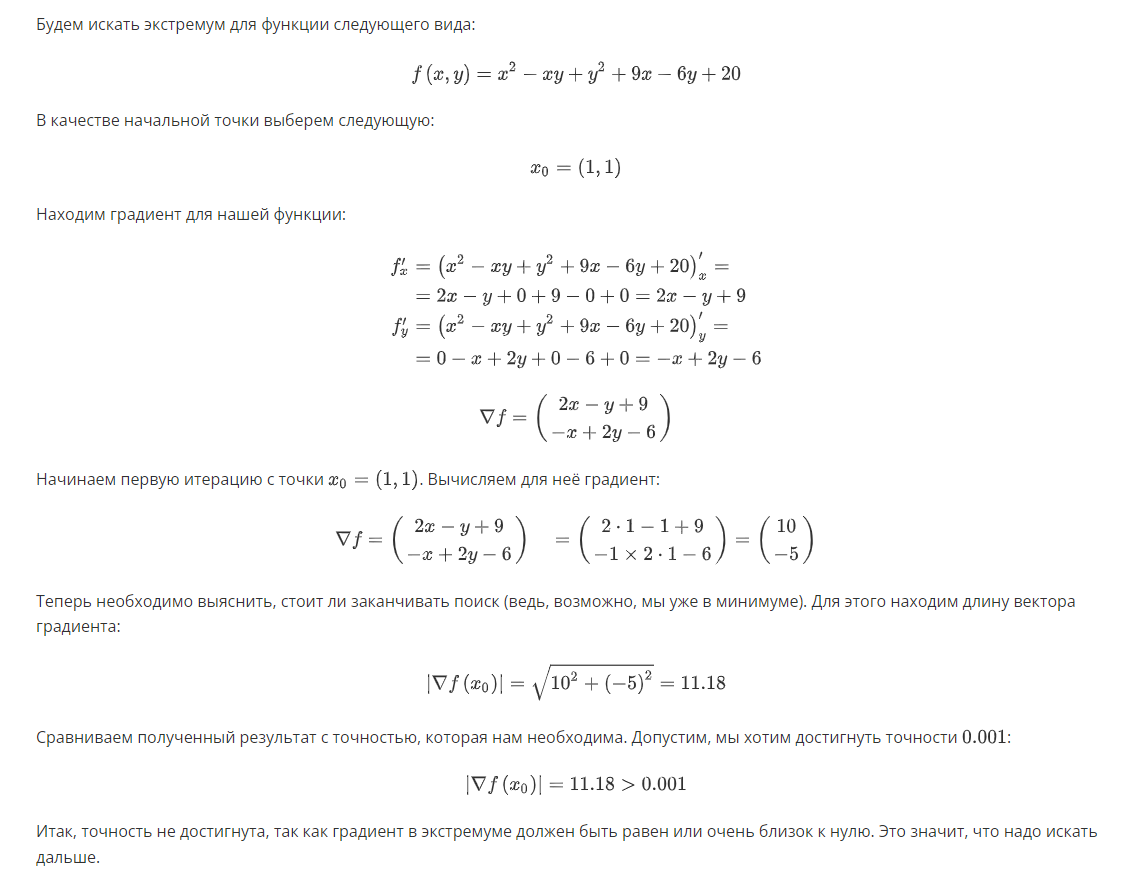

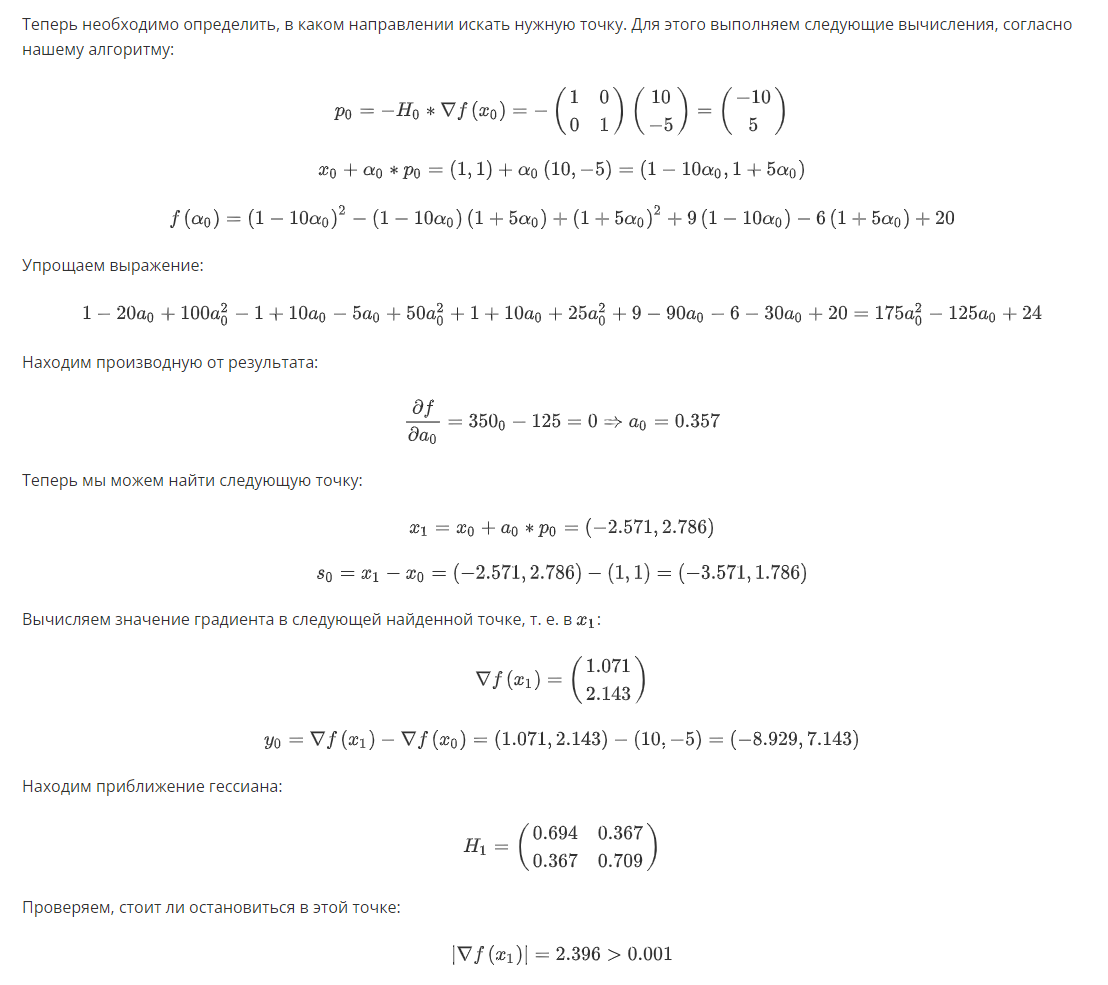

К сожалению, необходимая точность всё ещё не достигнута.

Перечисленные выше шаги стоит повторять до тех пор, пока не будет достигнуто значение, близкое к нулю (меньшее, чем изначально заданная точность).

Разумеется, при решении прикладных задач не понадобится делать ничего подобного, ведь мы умеем программировать и знаем, что в библиотеках Python есть все необходимые методы.

Давайте рассмотрим, как с помощью функций Python мы сможем применить квазиньютоновские методы для оптимизации функции $f(x,y) = x^2 + y^2$

Подгрузим необходимые библиотеки:

In [1]:
import numpy as np
from scipy.optimize import minimize

Определим функцию, которую будем оптимизировать. Вместо отдельных $x$ и $y$ можно взять координаты единого вектора:

In [2]:
def func(x):
    return x[0]**2.0 + x[1]**2.0

Теперь определим градиент для функции:

In [3]:
def grad_func(x):
    return np.array([x[0] * 2, x[1] * 2])

Зададим начальную точку:

In [4]:
x_0 = [1.0, 1.0]

Определим алгоритм:

In [5]:
result = minimize(func, x_0, method='BFGS', jac=grad_func)

Выведем результаты:

In [6]:
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 3
Решение: f([0. 0.]) = 0.00000


Итак, мы получили, что минимум функции достигается в точке (0,0). Значение функции в этой точке также равно нулю.

Можно повторить то же самое с вариацией  L-BFGS-B:

In [7]:
# определяем нашу функцию
def func(x):
    return x[0]**2.0 + x[1]**2.0
 
#  определяем градиент функции
def grad_func(x):
    return np.array([x[0] * 2, x[1] * 2])
 
# определяем начальную точку
x_0 = [1, 1]
# реализуем алгоритм L-BFGS-B
result = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)
# получаем результат
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Количество оценок: 3
Решение: f([0. 0.]) = 0.00000


Результат будет тем же самым.

→ Иногда количество итераций у двух модификаций различается, но ответ совпадает. Бывает также, что одна из вариаций может не сойтись, а другая — достичь экстремума, поэтому советуем не воспринимать их как взаимозаменяемые алгоритмы. На практике лучше пробовать разные варианты: если у вас не сошёлся алгоритм BFGS, можно попробовать L-BFGS-B, и наоборот. Также можно экспериментировать одновременно с обоими алгоритмами, чтобы выбрать тот, который будет сходиться для функции за меньшее число итераций и тем самым экономить время.

→ Важно понимать, что для некоторых функций не из всех стартовых точек получается достичь сходимости метода. Тогда их можно перебирать, к примеру, с помощью цикла.

## Задание 4.1


In [14]:
def func(x):
    return x[0] ** 4.0 - x[0] * x[1] + x[1] ** 2 + 9 * x[0] - 6 * x[1] \
        + 20

def grad_func(x):
    return np.array([2 * x[0] - x[1] + 9, -x[0] + 2 * x[1] - 6])

x_0 = [-400, -400]
result = minimize(func, x_0, method='BFGS', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 13
Решение: f([-3.99999852  1.00000155]) = 238.99963


## Задание 4.2

За счёт чего квазиньютоновские методы работают быстрее, чем обычный метод Ньютона?

+ Вместо обратного гессиана они вычисляют его приближение.

## Задание 4.3

Какую матрицу часто используют для аппроксимации обратного гессиана?

+ Единичную

## Задание 4.4

In [10]:
from scipy.optimize import minimize

def func(x):
    return x[0]**2.0 - 3*x[0] + 45

def grad_func(x):
    return 2*x[0]-3

x_0 = 10
result = minimize(func, x_0, method='BFGS', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 5
Решение: f([1.5]) = 42.75000


## Задание 4.5

In [11]:
from scipy.optimize import minimize

def func(x):
    return x[0]**2.0 - 3*x[0] + 45

def grad_func(x):
    return 2*x[0]-3

x_0 = 10
result = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Количество оценок: 3
Решение: f([1.5]) = 42.75000


## Задание 4.7

In [12]:
def func(x):
    return x[0] ** 4.0 + 6 * x[1]**2.0 + 10

def grad_func(x):
    return np.array([4 * x[0] ** 3, 12 * x[1]])

x_0 = [100.0, 100.0]
result = minimize(func, x_0, method='BFGS', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 37
Решение: f([1.31617159e-02 6.65344582e-14]) = 10.00000


In [13]:
def func(x):
    return x[0] ** 4.0 + 6 * x[1]**2.0 + 10

def grad_func(x):
    return np.array([4 * x[0] ** 3, 12 * x[1]])

x_0 = [100.0, 100.0]
result = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Количество оценок: 40
Решение: f([-9.52718297e-03 -2.32170510e-06]) = 10.00000
